In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Pregnancies: Number of times pregnant
#### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### BloodPressure: Diastolic blood pressure (mm Hg)
#### SkinThickness: Triceps skin fold thickness (mm)
#### Insulin: 2-Hour serum insulin (mu U/ml)
#### BMI: Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction: Diabetes pedigree function
#### Age: Age (years)
#### Outcome: Class variable (0 or 1)

In [49]:
diabetes_df = pd.read_csv(r"D:\Python - Problem Solving\NIT Conference 2025\Code Alpha Internship Tasks\diabetes.csv")

In [50]:
diabetes_df.drop_duplicates(inplace=True)

In [51]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

* ### What is the glucose threshold that separates diabetic from non-diabetic patients?

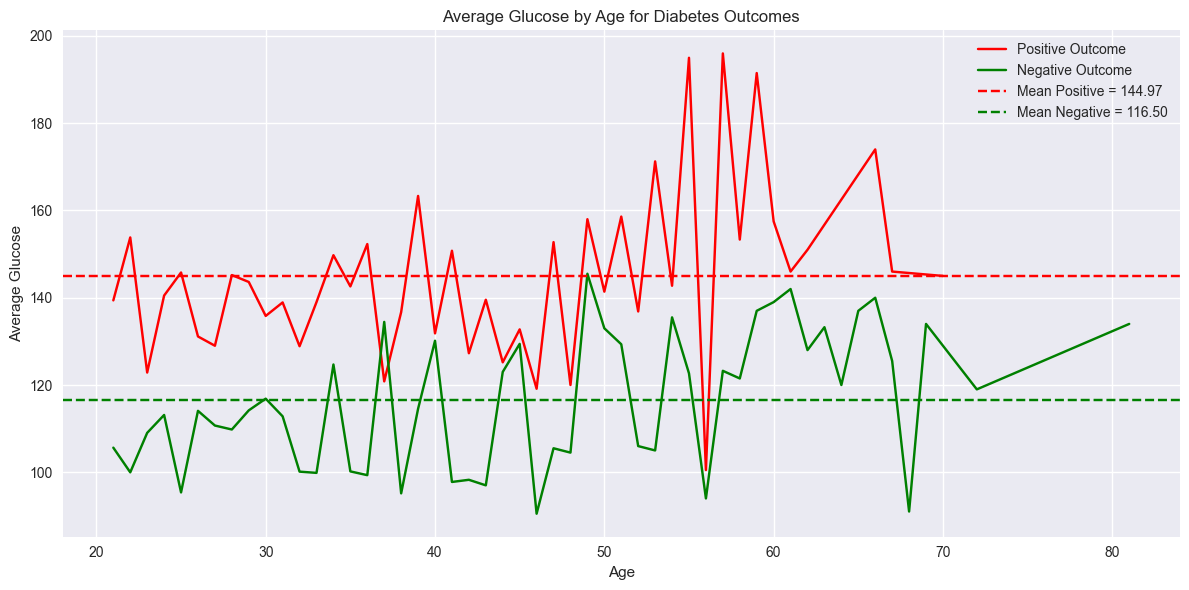

In [54]:
# Diabetic
positive = diabetes_df[diabetes_df["Outcome"] == 1]
avg_positive = positive.groupby('Age').mean()
mean_positive = avg_positive['Glucose'].mean()

# Non-Diabetic
negative = diabetes_df[diabetes_df["Outcome"] == 0]
avg_negative = negative.groupby('Age').mean()
mean_negative = avg_negative['Glucose'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_positive.index, avg_positive['Glucose'], label='Positive Outcome', color='red')
plt.plot(avg_negative.index, avg_negative['Glucose'], label='Negative Outcome', color='green')
plt.axhline(mean_positive, color='red', linestyle='--', label=f'Mean Positive = {mean_positive:.2f}')
plt.axhline(mean_negative, color='green', linestyle='--', label=f'Mean Negative = {mean_negative:.2f}')
plt.title('Average Glucose by Age for Diabetes Outcomes')
plt.xlabel('Age')
plt.ylabel('Average Glucose')
plt.legend()
plt.tight_layout()
plt.show()


* ### What combination of risk factors (BMI + Age + Glucose) creates the highest diabetes risk profile?

In [55]:
diabetes_df['BMI_bin'] = pd.cut(diabetes_df['BMI'], bins=5)
diabetes_df['Age_bin'] = pd.cut(diabetes_df['Age'], bins=5)
diabetes_df['Glucose_bin'] = pd.cut(diabetes_df['Glucose'], bins=5)

risk_profiles = diabetes_df.groupby(['BMI_bin', 'Age_bin', 'Glucose_bin'])['Outcome'].value_counts(normalize=True).unstack().fillna(0)
risk_profiles.columns = ['Non-Diabetic', 'Diabetic']
risk_profiles_reset = risk_profiles.reset_index()
top_risk_profiles = risk_profiles_reset.sort_values(by='Diabetic', ascending=False)

print(top_risk_profiles[['BMI_bin', 'Age_bin', 'Glucose_bin', 'Diabetic', 'Non-Diabetic']].head(20))


              BMI_bin        Age_bin     Glucose_bin  Diabetic  Non-Diabetic
13   (-0.0671, 13.42]   (45.0, 57.0]  (119.4, 159.2]  1.000000      0.000000
39     (13.42, 26.84]   (45.0, 57.0]  (159.2, 199.0]  1.000000      0.000000
55     (26.84, 40.26]   (33.0, 45.0]  (-0.199, 39.8]  1.000000      0.000000
34     (13.42, 26.84]   (33.0, 45.0]  (159.2, 199.0]  1.000000      0.000000
73     (26.84, 40.26]   (69.0, 81.0]  (119.4, 159.2]  1.000000      0.000000
104     (53.68, 67.1]  (20.94, 33.0]  (159.2, 199.0]  1.000000      0.000000
89     (40.26, 53.68]   (45.0, 57.0]  (159.2, 199.0]  1.000000      0.000000
80     (40.26, 53.68]   (33.0, 45.0]  (-0.199, 39.8]  1.000000      0.000000
102     (53.68, 67.1]  (20.94, 33.0]   (79.6, 119.4]  1.000000      0.000000
54     (26.84, 40.26]  (20.94, 33.0]  (159.2, 199.0]  0.916667      0.083333
59     (26.84, 40.26]   (33.0, 45.0]  (159.2, 199.0]  0.880000      0.120000
79     (40.26, 53.68]  (20.94, 33.0]  (159.2, 199.0]  0.846154      0.153846

C:\Users\pradipta\AppData\Local\Temp\ipykernel_10932\1176757982.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_profiles = diabetes_df.groupby(['BMI_bin', 'Age_bin', 'Glucose_bin'])['Outcome'].value_counts(normalize=True).unstack().fillna(0)


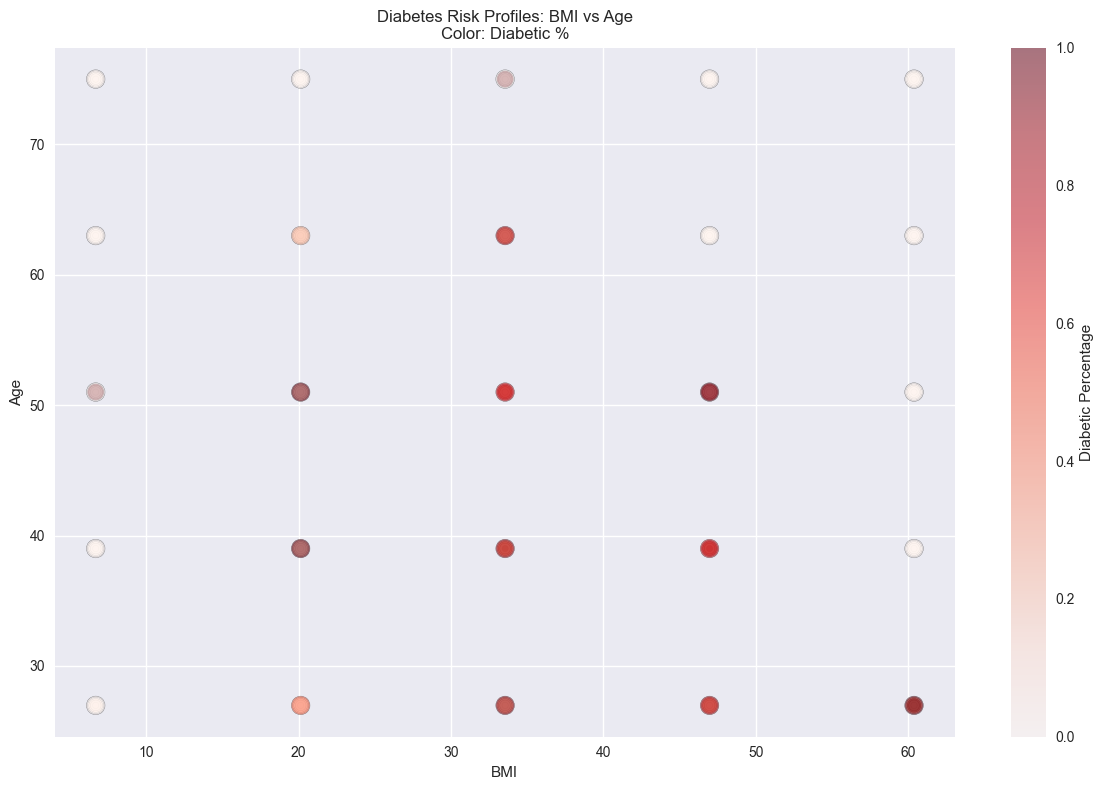

In [56]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

# Convert bins to midpoints for plotting
risk_profiles_reset['BMI_mid'] = risk_profiles_reset['BMI_bin'].apply(lambda x: x.mid)
risk_profiles_reset['Age_mid'] = risk_profiles_reset['Age_bin'].apply(lambda x: x.mid)
risk_profiles_reset['Glucose_mid'] = risk_profiles_reset['Glucose_bin'].apply(lambda x: x.mid)

# Scatter plot
scatter = plt.scatter(
    x=risk_profiles_reset['BMI_mid'],
    y=risk_profiles_reset['Age_mid'],
    c=risk_profiles_reset['Diabetic'],
    cmap='Reds',
    s=risk_profiles_reset['Glucose_mid'],
    alpha=0.5,
    edgecolor='k'
)

cbar = plt.colorbar(scatter)
cbar.set_label('Diabetic Percentage')
plt.title('Diabetes Risk Profiles: BMI vs Age\nColor: Diabetic %')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


In [57]:
diabetes_df.drop(['BMI_bin','Age_bin','Glucose_bin'], axis=1, inplace= True)

* ### Does family history (DiabetesPedigreeFunction) amplify risk when combined with obesity (BMI)?

C:\Users\pradipta\AppData\Local\Temp\ipykernel_10932\2843590017.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_mean = bmi_dpf_reset.groupby(['BMI_bin'])['DiabetesPedigreeFunction'].mean().dropna().reset_index()


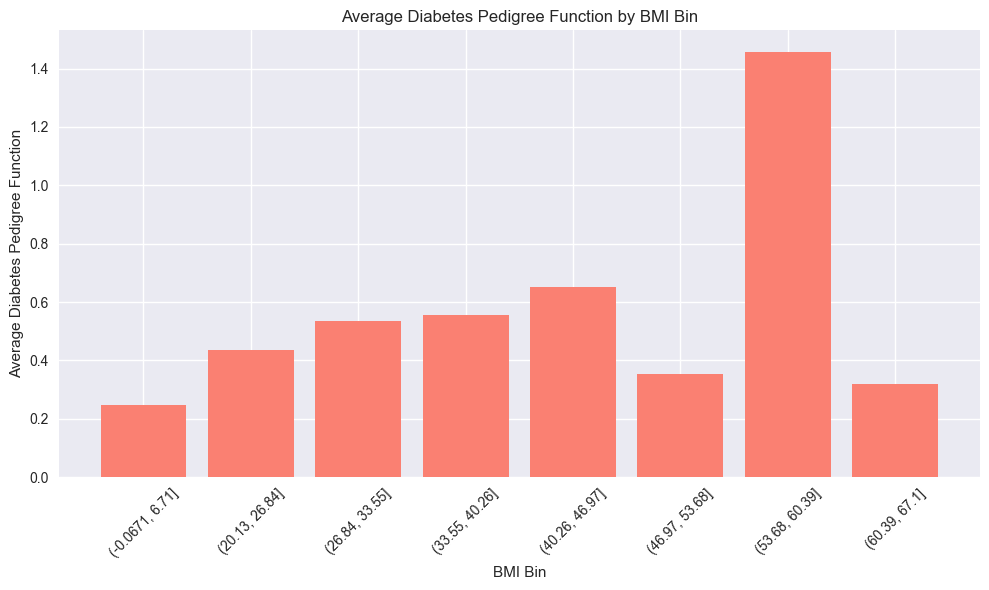

In [58]:
bmi_dpf = positive.groupby(['BMI','DiabetesPedigreeFunction'])['Outcome'].value_counts().unstack()
bmi_dpf_reset = bmi_dpf.reset_index()
bmi_dpf_reset['BMI_bin'] = pd.cut(bmi_dpf_reset['BMI'], bins=10)
binned_mean = bmi_dpf_reset.groupby(['BMI_bin'])['DiabetesPedigreeFunction'].mean().dropna().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(binned_mean['BMI_bin'].astype(str), binned_mean['DiabetesPedigreeFunction'], color='salmon')
plt.title('Average Diabetes Pedigree Function by BMI Bin')
plt.xlabel('BMI Bin')
plt.ylabel('Average Diabetes Pedigree Function')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


* ### Can we identify "metabolically healthy obese" patients (high BMI but low diabetes risk)?

C:\Users\pradipta\AppData\Local\Temp\ipykernel_10932\686643712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_risk_high_bmi['BMI_bin'] = pd.cut(low_risk_high_bmi['BMI'], bins= 10)
C:\Users\pradipta\AppData\Local\Temp\ipykernel_10932\686643712.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_bin = low_risk_high_bmi.groupby('BMI_bin')['Glucose'].count().reset_index()


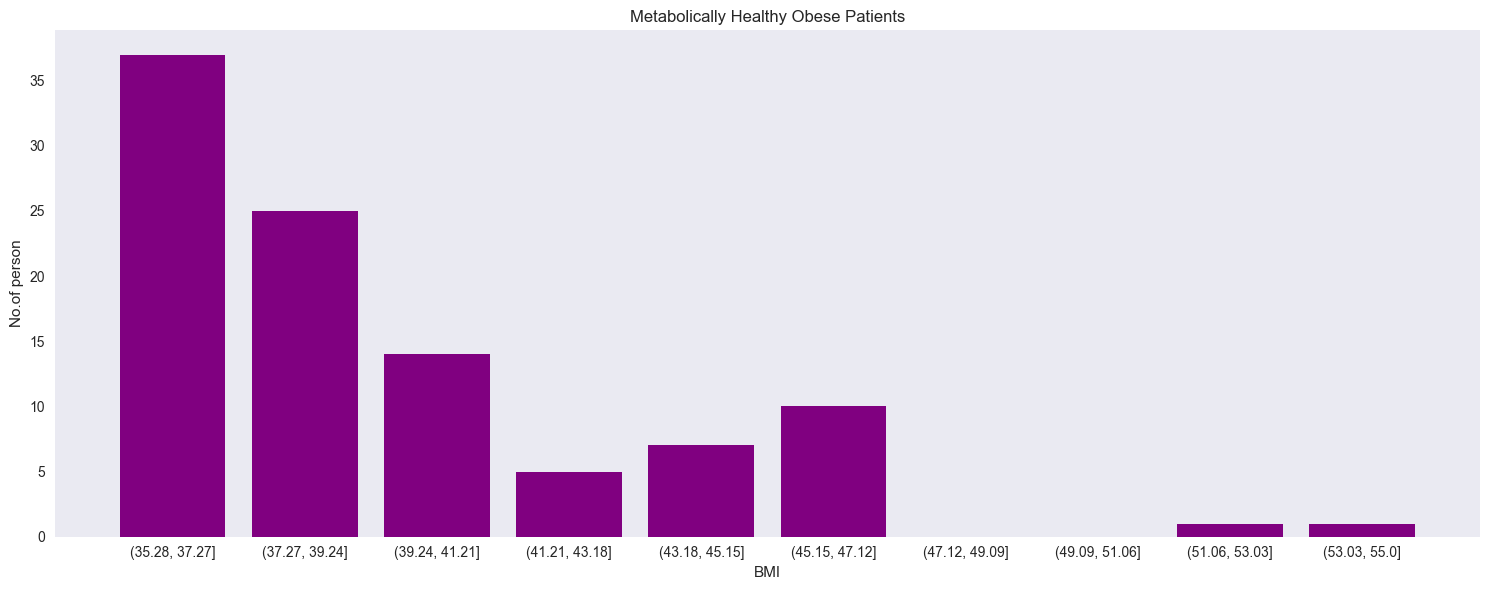

In [59]:
from matplotlib.container import BarContainer


low_risk_high_bmi = diabetes_df[
    (diabetes_df['Glucose']<= 117) &
     (diabetes_df['BMI']>= 35.14253731343284)
]

low_risk_high_bmi['BMI_bin'] = pd.cut(low_risk_high_bmi['BMI'], bins= 10)
data_bin = low_risk_high_bmi.groupby('BMI_bin')['Glucose'].count().reset_index()

plt.figure(figsize=(15, 6))
plt.bar(data_bin['BMI_bin'].astype(str), 
        data_bin['Glucose'], 
        color='purple'
)
plt.title('Metabolically Healthy Obese Patients')
plt.xlabel('BMI')
plt.ylabel('No.of person')
plt.grid(False)
plt.tight_layout()
plt.show()


* ### Are there undiagnosed diabetes cases (high glucose + no diabetes diagnosis) or misdiagnosed cases (low glucose + diabetes diagnosis)?

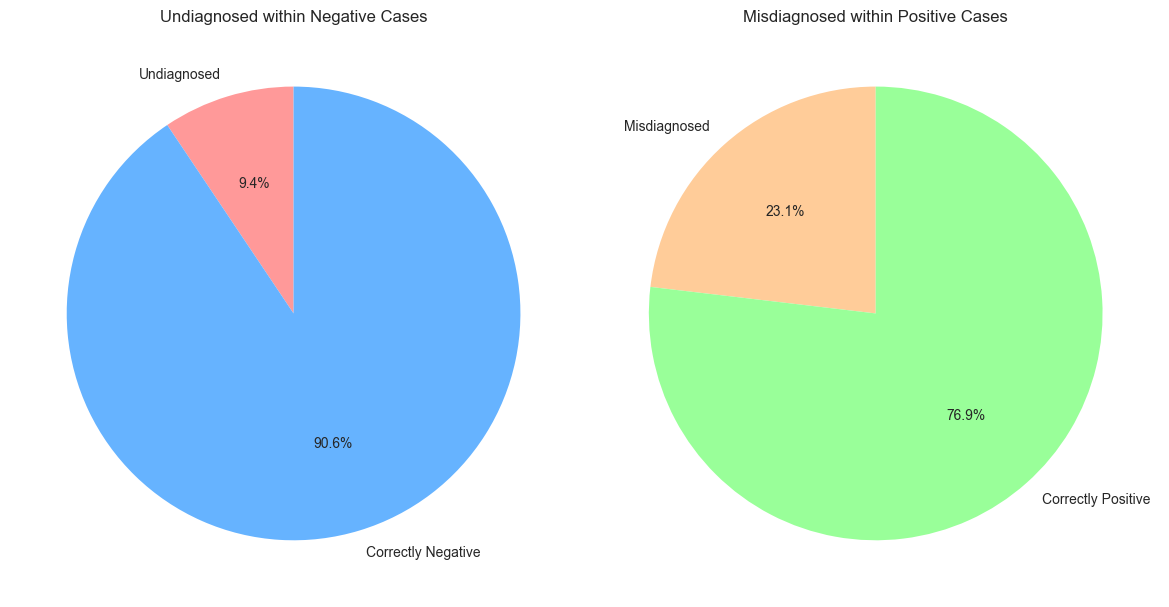

In [60]:
# Un-Dignosed Diabetes

un_diagnosed = diabetes_df[(diabetes_df['Outcome'] == 0) & (diabetes_df['Glucose'] >= 144.97)]

# Mis- Diagnosed Diabetes

mis_diagnosed = diabetes_df[(diabetes_df['Outcome'] == 1) & (diabetes_df['Glucose'] <= 116.50)]

un_diagnosed_count = len(un_diagnosed)
negative_count = len(negative)
mis_diagnosed_count = len(mis_diagnosed)
positive_count = len(positive)

# Pie chart 1: Undiagnosed within Negative
labels1 = ['Undiagnosed', 'Correctly Negative']
sizes1 = [un_diagnosed_count, negative_count - un_diagnosed_count]
colors1 = ['#ff9999','#66b3ff']

# Pie chart 2: Misdiagnosed within Positive
labels2 = ['Misdiagnosed', 'Correctly Positive']
sizes2 = [mis_diagnosed_count, positive_count - mis_diagnosed_count]
colors2 = ['#ffcc99','#99ff99']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Undiagnosed within Negative Cases')

axs[1].pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Misdiagnosed within Positive Cases')

plt.tight_layout()
plt.show()

* ### What is the BMI cutoff where diabetes risk doubles compared to normal-weight individuals?

C:\Users\pradipta\AppData\Local\Temp\ipykernel_10932\3663138350.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_bmi_bin = diabetes_df.groupby(bmi_bins)['Outcome'].mean()


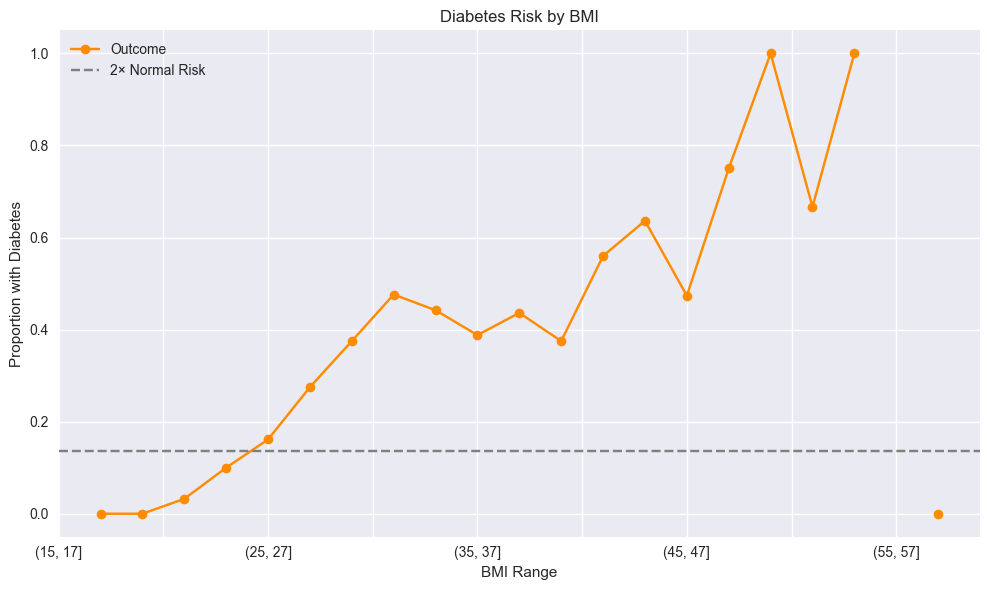

In [61]:
normal_bmi_range = (18.5, 24.9)

# Calculate diabetes risk in normal-weight group
normal_group = diabetes_df[(diabetes_df['BMI'] >= 18.5) & (diabetes_df['BMI'] <= 24.9)]
normal_risk = normal_group['Outcome'].mean()

# Bin BMI values and calculate diabetes risk per bin
bmi_bins = pd.cut(diabetes_df['BMI'], bins=np.arange(15, 60, 2))
risk_by_bmi_bin = diabetes_df.groupby(bmi_bins)['Outcome'].mean()

# Find the BMI bin where risk ≥ 2 × normal_risk
threshold_risk = 2 * normal_risk
bmi_cutoff_bin = risk_by_bmi_bin[risk_by_bmi_bin >= threshold_risk].index[0]
bmi_cutoff = bmi_cutoff_bin.left  # Lower bound of the bin

# Plotting
risk_by_bmi_bin.plot(kind='line', marker='o', figsize=(10, 6), color='darkorange')
plt.axhline(y=threshold_risk, color='gray', linestyle='--', label='2× Normal Risk')
plt.title('Diabetes Risk by BMI')
plt.xlabel('BMI Range')
plt.ylabel('Proportion with Diabetes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



* ### How many pregnancies increase diabetes risk, and is there a threshold effect?

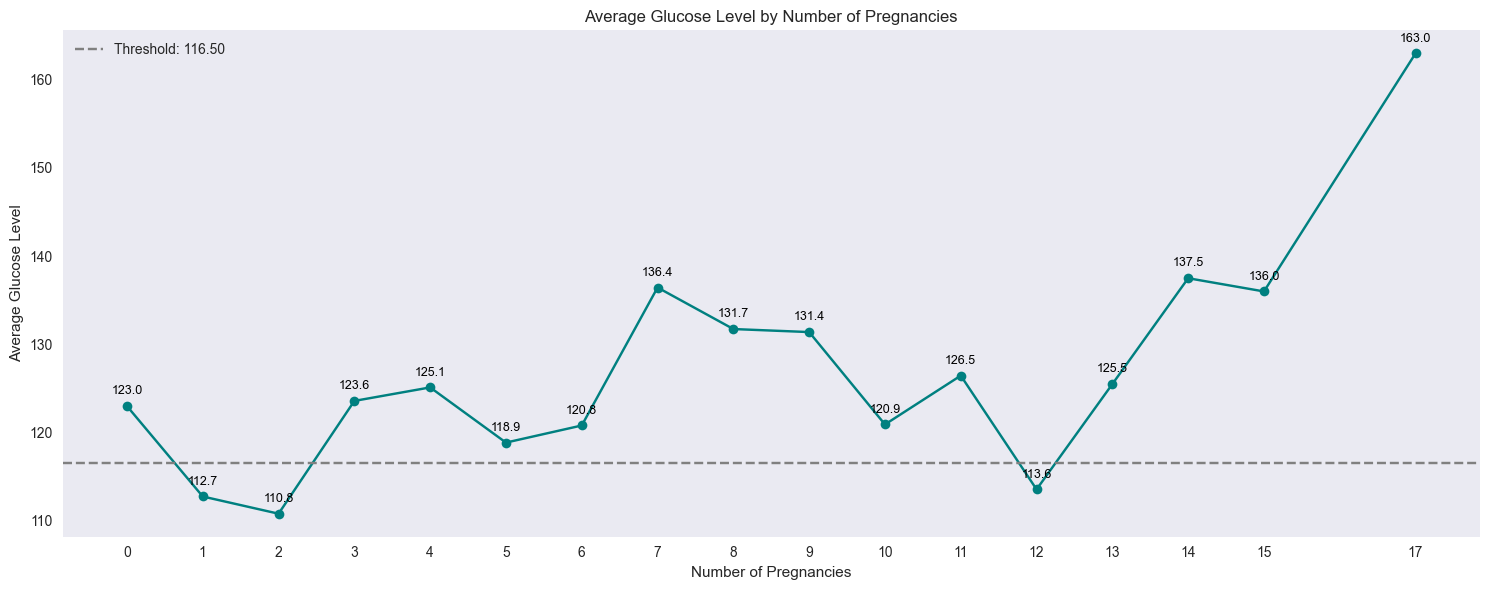

In [62]:
# Group by 'Pregnancies' and calculate mean glucose level
glucose_by_pregnancy = diabetes_df.groupby('Pregnancies')['Glucose'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(glucose_by_pregnancy.index, glucose_by_pregnancy.values, marker='o', linestyle='-', color='teal')
plt.title('Average Glucose Level by Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.xticks(glucose_by_pregnancy.index)  # Ensure all pregnancy counts appear on X-axis
plt.ylabel('Average Glucose Level')
plt.axhline(y=116.50, linestyle='--', color='grey', label='Threshold: 116.50')
plt.grid(False)

# Add value labels on each point
for x, y in zip(glucose_by_pregnancy.index, glucose_by_pregnancy.values):
    plt.text(x, y + 1, f'{y:.1f}', ha='center', va='bottom', fontsize=9, color='black')

plt.legend()
plt.tight_layout()
plt.show()

* ### What is the Blood Pressure range associated with lowest & Highest diabetes risk, and how does it compare to standard clinical guidelines?

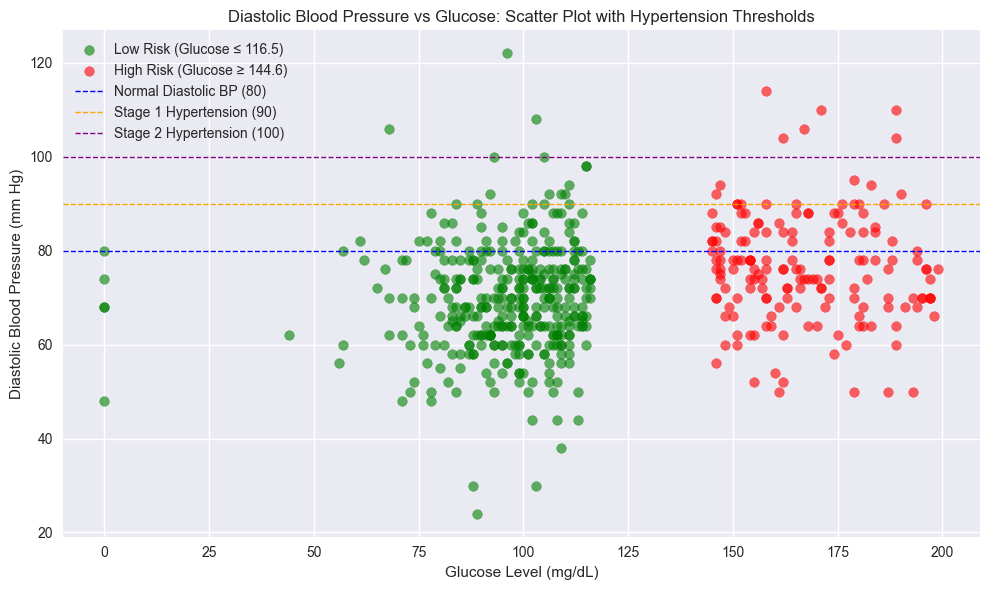

In [63]:
filtered_df = diabetes_df[diabetes_df['BloodPressure'] > 0]
bp_low_risk = filtered_df[filtered_df['Glucose'] <= 116.5]
bp_high_risk = filtered_df[filtered_df['Glucose'] >= 144.6]

plt.figure(figsize=(10, 6))

# Scatter plot for low-risk group
plt.scatter(bp_low_risk['Glucose'], bp_low_risk['BloodPressure'], color='green', label='Low Risk (Glucose ≤ 116.5)', alpha=0.6)

# Scatter plot for high-risk group
plt.scatter(bp_high_risk['Glucose'], bp_high_risk['BloodPressure'], color='red', label='High Risk (Glucose ≥ 144.6)', alpha=0.6)

# Reference lines for diastolic blood pressure categories
plt.axhline(y=80, color='blue', linestyle='--', linewidth=1, label='Normal Diastolic BP (80)')
plt.axhline(y=90, color='orange', linestyle='--', linewidth=1, label='Stage 1 Hypertension (90)')
plt.axhline(y=100, color='purple', linestyle='--', linewidth=1, label='Stage 2 Hypertension (100)')

plt.title('Diastolic Blood Pressure vs Glucose: Scatter Plot with Hypertension Thresholds')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Diastolic Blood Pressure (mm Hg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


* ### What is the "optimal health profile" (Blood Pressure, BMI, Pregnancies ranges) that minimizes diabetes risk to <5%?


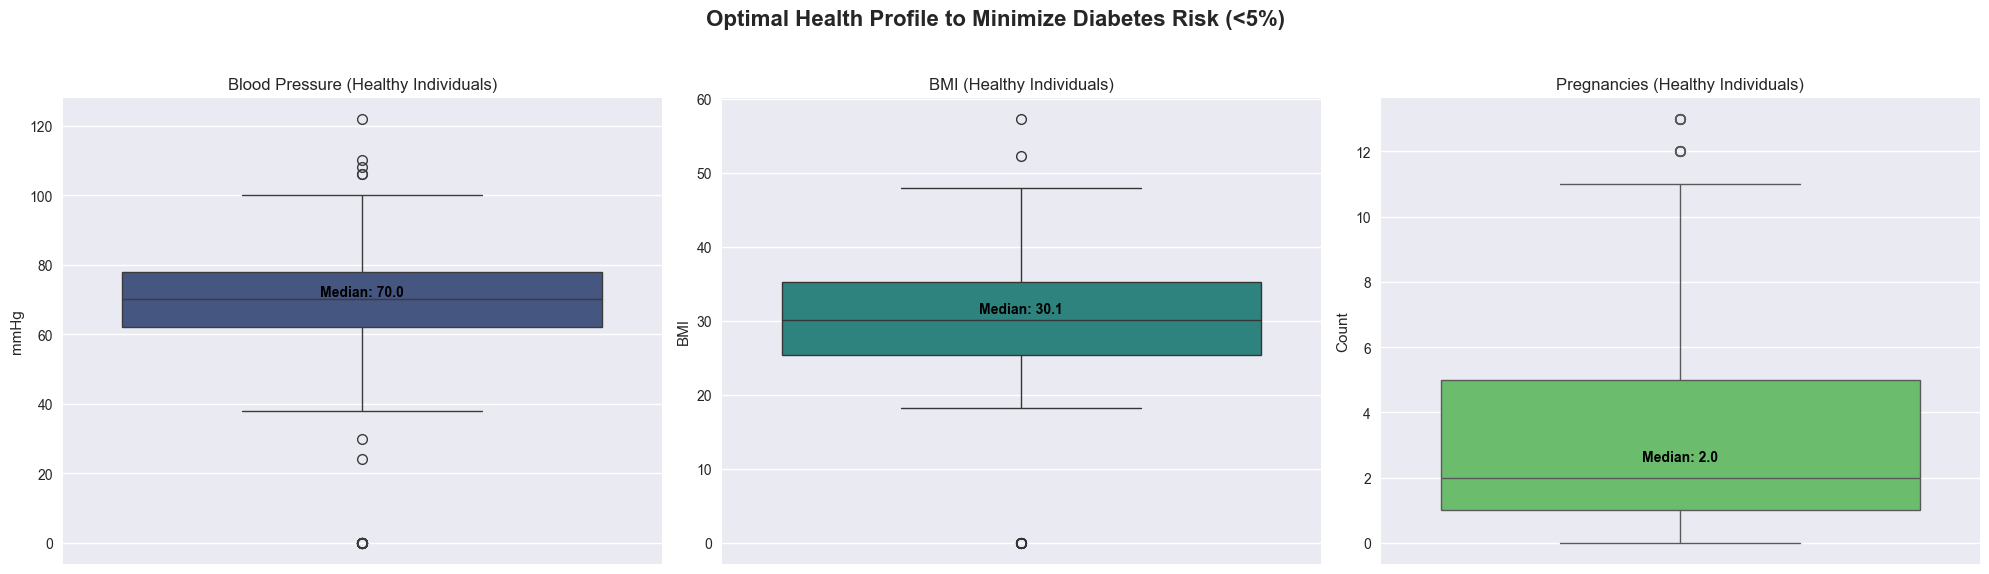

In [64]:
# Blood Pressure
low_risk_bp = negative[ negative['BloodPressure']> 0].mean()
high_risk_bp = positive['BloodPressure'].mean()
min_bp = negative[negative['BloodPressure']>0].min()
high_bp = positive['BloodPressure'].max()

# Filter valid BMI values
low_risk_bmi = negative[negative['BMI'] > 0]['BMI'].mean()
high_risk_bmi = positive['BMI'].mean()
min_bmi = negative[negative['BMI'] > 0]['BMI'].min()
max_bmi = positive['BMI'].max()

# Filter valid Pregnancy values
low_risk_preg = negative[negative['Pregnancies'] >= 0]['Pregnancies'].mean()
high_risk_preg = positive['Pregnancies'].mean()
min_preg = negative['Pregnancies'].min()
max_preg = positive['Pregnancies'].max()


# Filter only healthy individuals
healthy_df = diabetes_df[diabetes_df['Outcome'] == 0]

# Set color palette
colors = sns.color_palette("viridis", 3)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Blood Pressure
sns.boxplot(y='BloodPressure', data=healthy_df, ax=axes[0], color=colors[0])
median_bp = healthy_df['BloodPressure'].median()
axes[0].set_title('Blood Pressure (Healthy Individuals)')
axes[0].set_ylabel('mmHg')
axes[0].text(0, median_bp + 1, f'Median: {median_bp:.1f}', ha='center', color='black', weight='bold')

# BMI
sns.boxplot(y='BMI', data=healthy_df, ax=axes[1], color=colors[1])
median_bmi = healthy_df['BMI'].median()
axes[1].set_title('BMI (Healthy Individuals)')
axes[1].set_ylabel('BMI')
axes[1].text(0, median_bmi + 1, f'Median: {median_bmi:.1f}', ha='center', color='black', weight='bold')

# Pregnancies
sns.boxplot(y='Pregnancies', data=healthy_df, ax=axes[2], color=colors[2])
median_preg = healthy_df['Pregnancies'].median()
axes[2].set_title('Pregnancies (Healthy Individuals)')
axes[2].set_ylabel('Count')
axes[2].text(0, median_preg + 0.5, f'Median: {median_preg:.1f}', ha='center', color='black', weight='bold')

# Overall layout
plt.suptitle('Optimal Health Profile to Minimize Diabetes Risk (<5%)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* ### Can we create a "Physical Health Score" combining Age, DiabetesPedigreeFunction and Skin Thickness that outperforms any single metric in predicting diabetes?

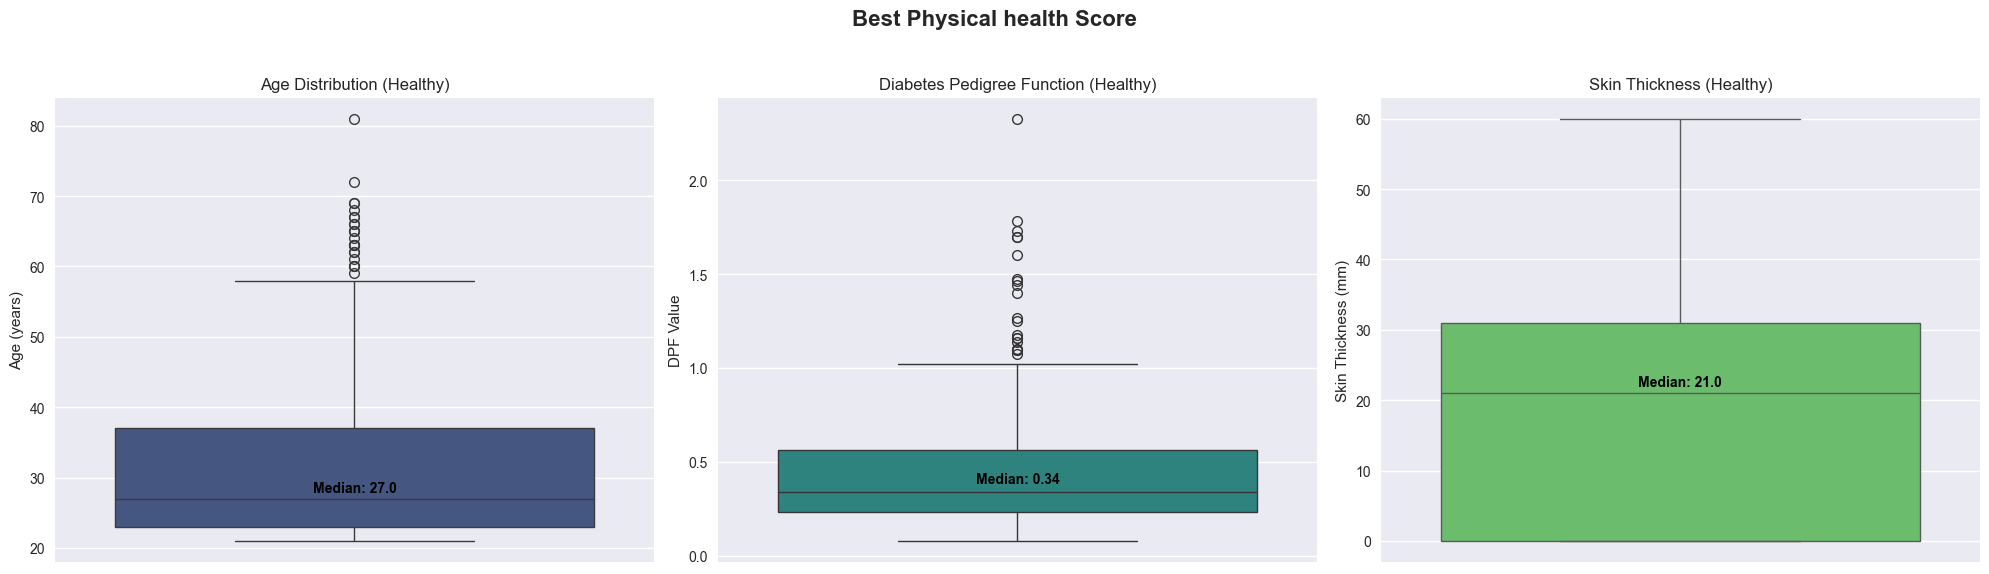

In [65]:
# Age
low_risk_age = negative['Age'].mean()
high_risk_age = positive['Age'].mean()
min_age = negative['Age'].min()
max_age = positive['Age'].max()

# Diabetic Pedegree Function
low_risk_dpf = negative['DiabetesPedigreeFunction'].mean()
high_risk_dpf = positive['DiabetesPedigreeFunction'].mean()
min_dpf = negative['DiabetesPedigreeFunction'].min()
max_dpf = positive['DiabetesPedigreeFunction'].max()

# Skin Thickness
low_risk_skin = negative[negative['SkinThickness'] > 0]['SkinThickness'].mean()
high_risk_skin = positive['SkinThickness'].mean()
min_skin = negative[negative['SkinThickness'] > 0]['SkinThickness'].min()
max_skin = positive['SkinThickness'].max()

palette = {'0': '#1f77b4', '1': '#ff7f0e'}  # blue for healthy, orange for diabetic

# Filter only healthy individuals
healthy_df = diabetes_df[diabetes_df['Outcome'] == 0]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = sns.color_palette("viridis", 3)

# Age
sns.boxplot(y='Age', data=healthy_df, ax=axes[0], color=colors[0])
median_age = healthy_df['Age'].median()
axes[0].set_title('Age Distribution (Healthy)')
axes[0].set_ylabel('Age (years)')
axes[0].text(0, median_age + 1, f'Median: {median_age:.1f}', ha='center', color='black', weight='bold')

# DPF
sns.boxplot(y='DiabetesPedigreeFunction', data=healthy_df, ax=axes[1], color=colors[1])
median_dpf = healthy_df['DiabetesPedigreeFunction'].median()
axes[1].set_title('Diabetes Pedigree Function (Healthy)')
axes[1].set_ylabel('DPF Value')
axes[1].text(0, median_dpf + 0.05, f'Median: {median_dpf:.2f}', ha='center', color='black', weight='bold')

# Skin Thickness
sns.boxplot(y='SkinThickness', data=healthy_df, ax=axes[2], color=colors[2])
median_skin = healthy_df['SkinThickness'].median()
axes[2].set_title('Skin Thickness (Healthy)')
axes[2].set_ylabel('Skin Thickness (mm)')
axes[2].text(0, median_skin + 1, f'Median: {median_skin:.1f}', ha='center', color='black', weight='bold')

# Layout
plt.suptitle('Best Physical health Score', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
